# **Image classifcation of MNIST Dataset using CNN**
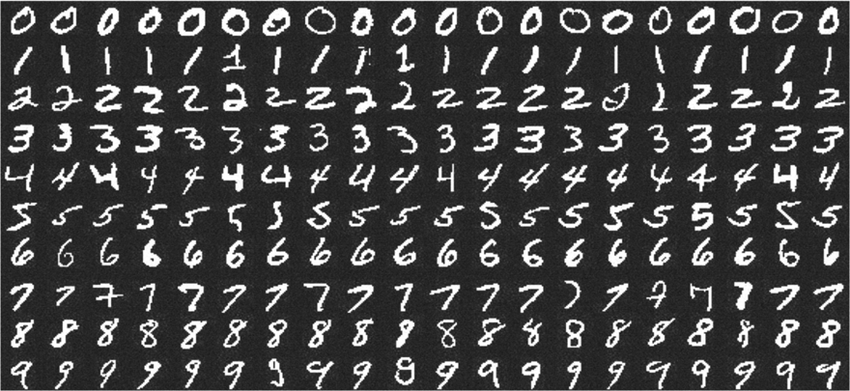

## Library import

In [8]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten, Dropout

## Load MNIST dataset

In [2]:
# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Data pre-processing

In [4]:
# normalize train and test data
X_train = X_train/255.
X_test = X_test/255.

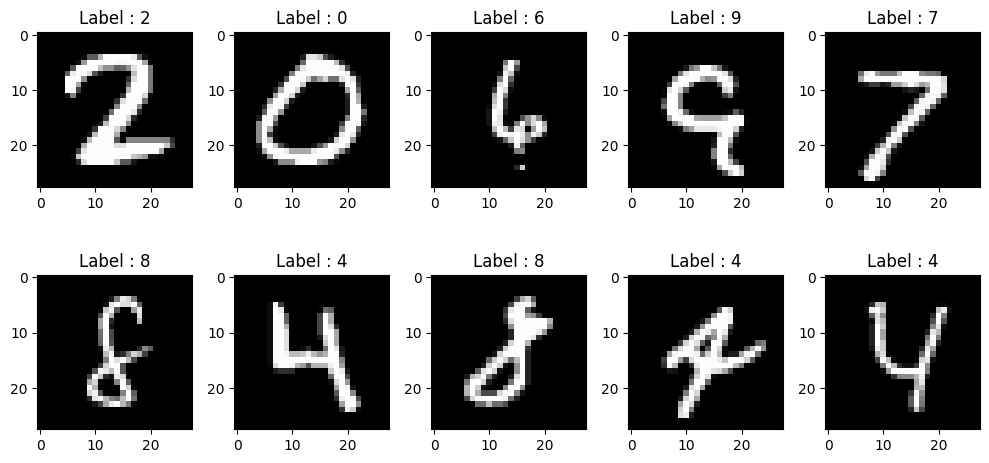

In [7]:
# Plot 10 different images
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    r = np.random.randint(60000)
    plt.imshow(X_train[r], cmap=plt.cm.gray)
    plt.title("Label : " + str(y_train[r]))

plt.tight_layout()
plt.show()

In [14]:
# flatten train and test images to 1D array and categorize the train and test labels
from keras.utils import to_categorical
X_train = np.array([x.flatten() for x in X_train])
y_train = np.array([to_categorical(y, 10) for y in y_train])

X_test = np.array([x.flatten() for x in X_test])
y_test = np.array([to_categorical(y, 10) for y in y_test])

In [15]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [16]:
# reshape train and test data to add grayscale channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## CNN Model

In [20]:
# build the neural network
model = Sequential()
model.add(Convolution2D(128, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(64, kernel_size = (3, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(10, activation = 'softmax'))

In [21]:
model.summary() # summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

## Model training

In [22]:
# compile the model and fit the model to the dataset
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1902 - accuracy: 0.9422 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0714 - accuracy: 0.9795 - val_loss: 0.0443 - val_accuracy: 0.9858
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9848 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0407 - val_accuracy: 0.9900
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0408 - val_accuracy

## Model Evaluation

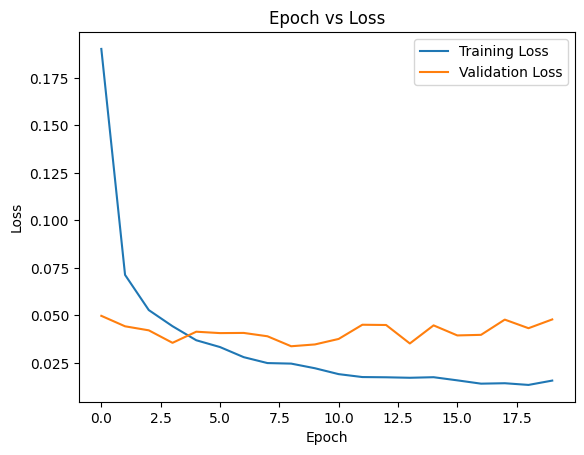

In [23]:
# plot a graph for training vs. validation loss over epochs
score = model.history.history
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(model.history.epoch, score['loss'], label = 'Training Loss')
plt.plot(model.history.epoch, score['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

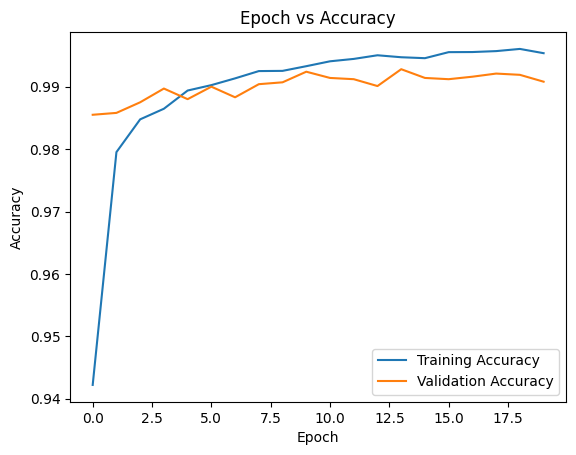

In [24]:
# plot a graph for training vs. validation accuracy over epochs

score = model.history.history
plt.title("Epoch vs Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(model.history.epoch, score['accuracy'], label = 'Training Accuracy')
plt.plot(model.history.epoch, score['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [25]:
# evaluate the trained model on test dataset
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9908


[0.047925915569067, 0.9908000230789185]

In [26]:
# the ground_truth value of the test data
y_true = np.argmax(y_test, axis=-1)

In [29]:
# create prediction on test dataset
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

313/313 [==============================] - 1s 2ms/step


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

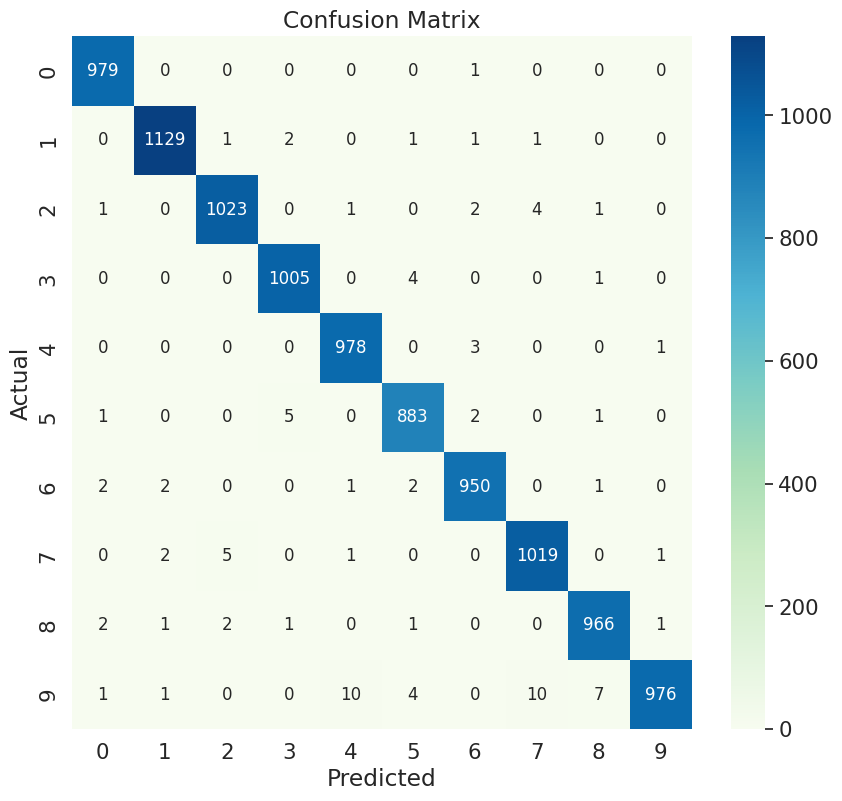

In [31]:
# plot confusion matrix
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="GnBu", annot=True, fmt= 'g', annot_kws={"size": 12})# font size

## Conclusion

I loaded the MNIST dataset using TensorFlow's mnist.load_data() function, which provided me with both training and testing images along with their respective labels. These pixel values were then normalized, ensuring they ranged from 0 to 1, by dividing each value by 255.

For a quick exploration, I displayed a random selection of 10 images from the training set, each labeled accordingly.

To prepare the data for input into a neural network, I flattened the 28x28 images into 1D arrays. Additionally, I one-hot encoded the labels, transforming them into vectors of length 10 since there are 10 classes in the MNIST dataset.

For compatibility with the Convolutional Neural Network (CNN) layers, I reshaped the data to have a single channel, which is appropriate for grayscale images.

Moving on to the model architecture, I opted for a Sequential model, a straightforward linear stack of layers. I designed it with two Convolutional layers employing ReLU activation, followed by two MaxPooling layers for downsampling spatial dimensions. To mitigate overfitting, I included three Dropout layers. Further, I integrated two Dense (fully connected) layers, each activated by ReLU, followed by a Dropout layer. For the final classification, I appended a Dense layer with 10 units (matching the number of classes in MNIST) and employed a softmax activation.

Upon compiling the model, I selected categorical cross-entropy as the loss function, fitting for this multi-class classification problem. The Adam optimizer, known for its efficiency and robustness against noisy gradients, was my choice. I opted to evaluate the model's performance based on accuracy.

With the model defined and compiled, I proceeded to train it using the preprocessed training data. To monitor performance on unseen data, I specified validation data.

Following the training, I visualized the training and validation loss as well as accuracy across epochs.

To assess the model's generalization performance, I evaluated it on the test data. I also computed the true labels (y_true) and the predicted labels (y_pred). This allowed me to generate a confusion matrix, providing a visual representation of the model's performance.

In conclusion, my choices in configuring and training the neural network were guided by established best practices for image classification tasks on the MNIST dataset. These included appropriate model architecture, choice of loss function and optimizer, data normalization, and thorough evaluation on a separate test set.